In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
train_df = pd.read_csv('DEFCON_train.csv')
test_df = pd.read_csv('DEFCON_test.csv')

In [3]:
train_df.head()

,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands),Id,DEFCON_Level
0,9,1,0.30,6,19.0,56.0,0.919971,368.88,1,924000.0,1775,2
1,8,0,0.26,2,4.0,11.0,0.450073,359.34,1,924000.0,910,2
2,9,0,0.57,2,18.0,44.0,0.452276,364.64,1,1020800.0,4767,3
3,10,0,0.46,2,5.0,12.0,0.541850,322.24,1,897600.0,5019,5
4,12,1,0.50,1,10.0,17.0,0.685022,340.26,1,950400.0,9006,2


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Allied_Nations                8000 non-null   int64  
 1   Diplomatic_Meetings_Set       8000 non-null   int64  
 2   Percent_Of_Forces_Mobilized   8000 non-null   float64
 3   Hostile_Nations               8000 non-null   int64  
 4   Active_Threats                8000 non-null   float64
 5   Inactive_Threats              8000 non-null   float64
 6   Citizen_Fear_Index            8000 non-null   float64
 7   Closest_Threat_Distance(km)   8000 non-null   float64
 8   Aircraft_Carriers_Responding  8000 non-null   int64  
 9   Troops_Mobilized(thousands)   8000 non-null   float64
 10  Id                            8000 non-null   int64  
 11  DEFCON_Level                  8000 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 750.1 KB


In [5]:
train_df.describe()

,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands),Id,DEFCON_Level
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.00000,8.000000e+03,8000.000000,8000.000000
mean,8.315000,0.524000,0.271124,2.499375,15.764563,46.529750,0.485911,350.847678,0.89025,9.179198e+05,6270.735375,2.616875
std,1.750331,0.500455,0.196465,1.296422,10.438006,33.890953,0.135431,16.197573,0.32706,9.305502e+04,3610.349333,0.798699
min,5.000000,0.000000,0.000000,1.000000,1.000000,6.000000,0.000000,290.440000,0.00000,7.392000e+05,2.000000,1.000000
25%,7.000000,0.000000,0.090000,2.000000,7.000000,21.000000,0.406021,340.260000,1.00000,8.360000e+05,3158.750000,2.000000
50%,8.000000,1.000000,0.260000,2.000000,13.000000,37.000000,0.486784,350.860000,1.00000,8.976000e+05,6252.500000,3.000000
75%,9.000000,1.000000,0.430000,3.000000,21.000000,62.000000,0.567548,360.400000,1.00000,9.768000e+05,9393.250000,3.000000
max,16.000000,2.000000,1.000000,16.000000,72.000000,289.000000,1.000000,425.060000,2.00000,1.311200e+06,12500.000000,5.000000


In [6]:
train_df['Allied_Nations'].value_counts()

8     2277
7     1993
9     1140
10     833
6      704
12     384
11     358
5      143
13     120
14      22
16      20
15       6
Name: Allied_Nations, dtype: int64

In [7]:
train_df['Diplomatic_Meetings_Set'].value_counts()

1    4184
0    3812
2       4
Name: Diplomatic_Meetings_Set, dtype: int64

In [8]:
train_df['Hostile_Nations'].value_counts()

2     5532
3     1448
4      353
1      238
6      160
5      114
8       53
7       44
9       23
11       9
13       8
14       8
15       7
16       3
Name: Hostile_Nations, dtype: int64

In [9]:
train_df['Closest_Threat_Distance(km)'].mean()

350.8476775000029

In [10]:
train_df['Active_Threats'].value_counts()

6.0     720
5.0     556
15.0    383
12.0    372
10.0    369
7.0     360
9.0     343
17.0    303
16.0    295
11.0    294
13.0    284
8.0     266
14.0    229
3.0     228
18.0    222
21.0    220
4.0     216
19.0    216
26.0    164
24.0    159
27.0    154
20.0    150
23.0    145
25.0    130
22.0    113
28.0    109
29.0    108
32.0    105
31.0    105
34.0     86
30.0     72
35.0     66
33.0     52
36.0     44
38.0     39
40.0     34
41.0     28
51.0     27
42.0     25
39.0     25
37.5     16
37.0     16
43.0     15
52.0     14
48.0     13
45.0     13
54.0     11
57.0     10
50.0      9
1.0       9
40.5      8
2.0       8
72.0      8
46.0      6
47.0      6
5.5       5
66.0      5
53.0      5
55.0      4
68.0      3
Name: Active_Threats, dtype: int64

In [11]:
train_df['DEFCON_Level'].value_counts()

2    3407
3    3157
4     958
1     393
5      85
Name: DEFCON_Level, dtype: int64

In [12]:
train_df['Inactive_Threats'].value_counts()

28.0     219
24.0     185
14.0     181
12.0     179
20.0     168
        ... 
153.0      5
6.0        5
139.0      5
142.0      4
128.0      4
Name: Inactive_Threats, Length: 144, dtype: int64

In [13]:
train_df['Aircraft_Carriers_Responding'].value_counts()

1    7048
0     915
2      37
Name: Aircraft_Carriers_Responding, dtype: int64

In [14]:
train_df['Troops_Mobilized(thousands)'].value_counts().sum()

8000

In [15]:
train_df.drop('Id', axis = 1, inplace = True)

In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Allied_Nations                8000 non-null   int64  
 1   Diplomatic_Meetings_Set       8000 non-null   int64  
 2   Percent_Of_Forces_Mobilized   8000 non-null   float64
 3   Hostile_Nations               8000 non-null   int64  
 4   Active_Threats                8000 non-null   float64
 5   Inactive_Threats              8000 non-null   float64
 6   Citizen_Fear_Index            8000 non-null   float64
 7   Closest_Threat_Distance(km)   8000 non-null   float64
 8   Aircraft_Carriers_Responding  8000 non-null   int64  
 9   Troops_Mobilized(thousands)   8000 non-null   float64
 10  DEFCON_Level                  8000 non-null   int64  
dtypes: float64(6), int64(5)
memory usage: 687.6 KB


Allied_Nations


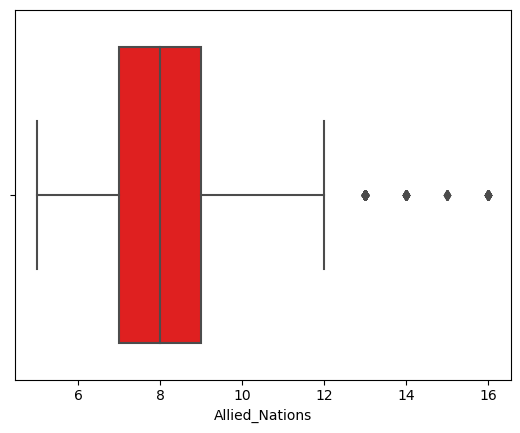

Diplomatic_Meetings_Set


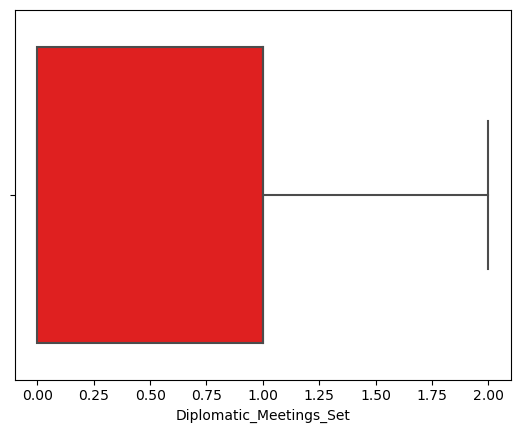

Percent_Of_Forces_Mobilized


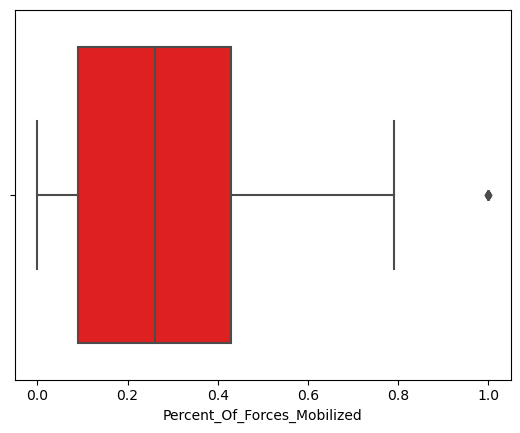

Hostile_Nations


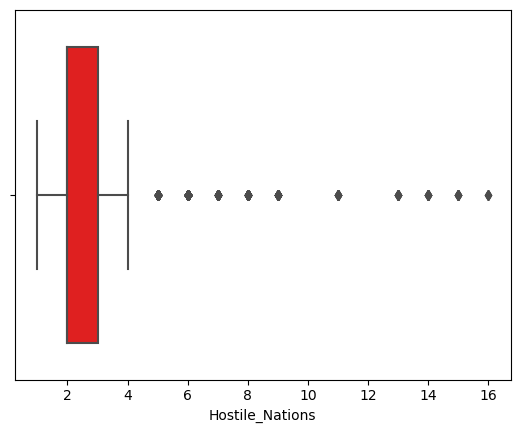

Active_Threats


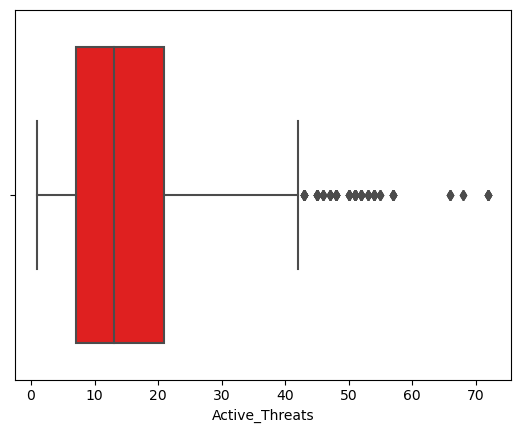

Inactive_Threats


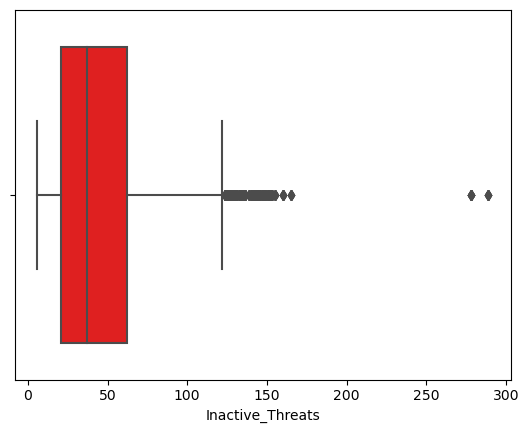

Citizen_Fear_Index


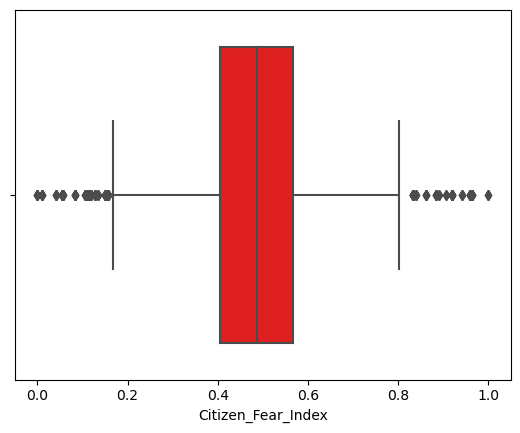

Closest_Threat_Distance(km)


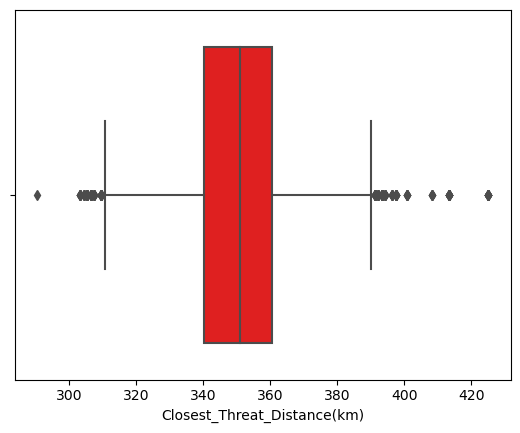

Aircraft_Carriers_Responding


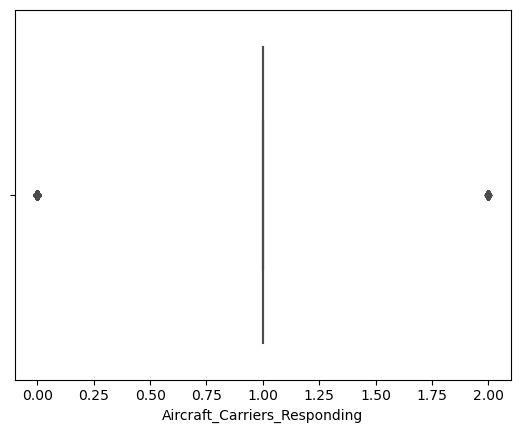

Troops_Mobilized(thousands)


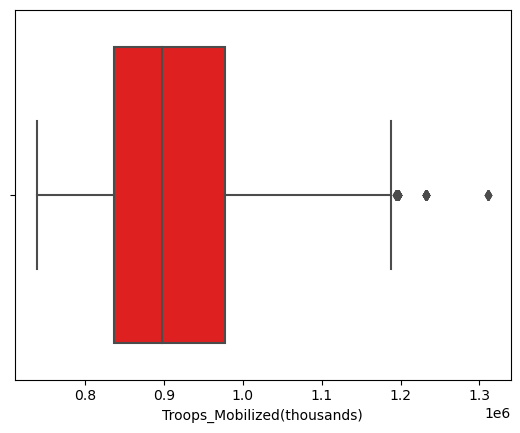

DEFCON_Level


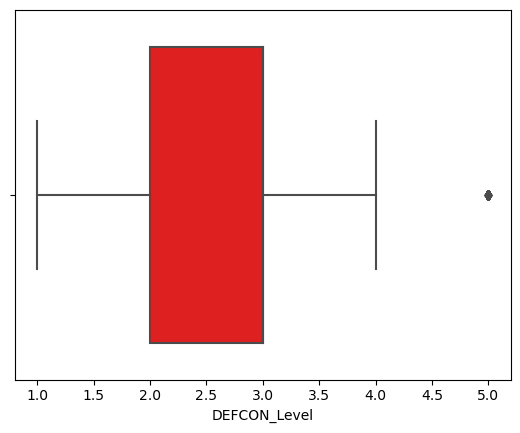

In [17]:
for col in train_df.iloc[:,0:].columns:
    print(col)
    sns.boxplot(x = train_df[col], data = train_df, color = 'red')
    plt.show()

In [18]:
def get_bounds(train_df, col):
    Q1 = train_df[col].quantile(0.25)
    Q3 = train_df[col].quantile(0.75)
    IQR = Q3-Q1
    Upper = Q3+(1.5*IQR)
    Lower = Q1-(1.5*IQR)
    return Upper, Lower

In [19]:
num_col = ['Allied_Nations', 'Percent_Of_Forces_Mobilized', 'Hostile_Nations', 'Active_Threats', 'Inactive_Threats',
          'Citizen_Fear_Index', 'Closest_Threat_Distance(km)', 'Troops_Mobilized(thousands)']

In [20]:
for col in num_col:
    Upper, Lower = get_bounds(train_df, col)
    train_df[col] = np.where(train_df[col]>Upper, Upper, train_df[col])
    train_df[col] = np.where(train_df[col]<Lower, Lower, train_df[col])

Allied_Nations


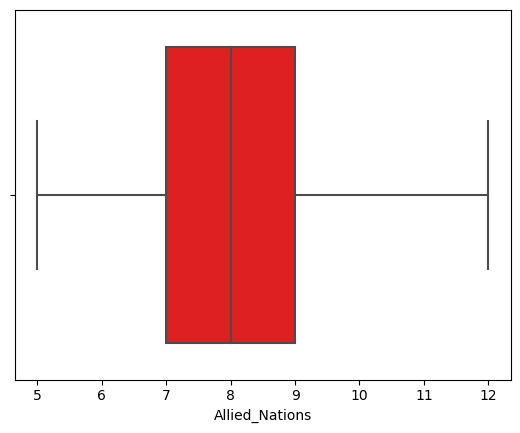

Diplomatic_Meetings_Set


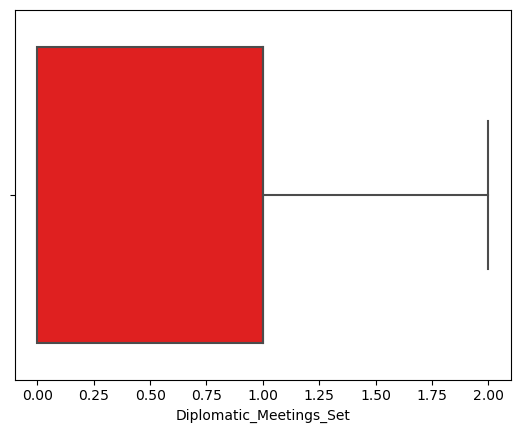

Percent_Of_Forces_Mobilized


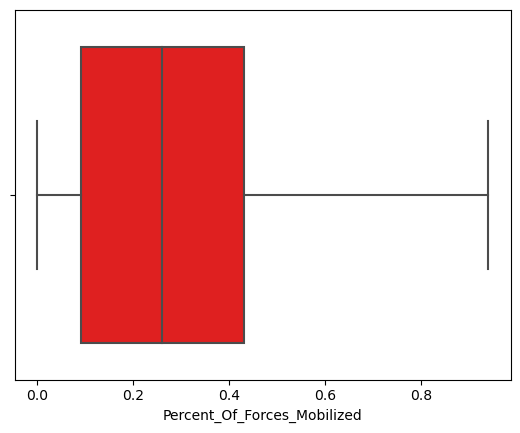

Hostile_Nations


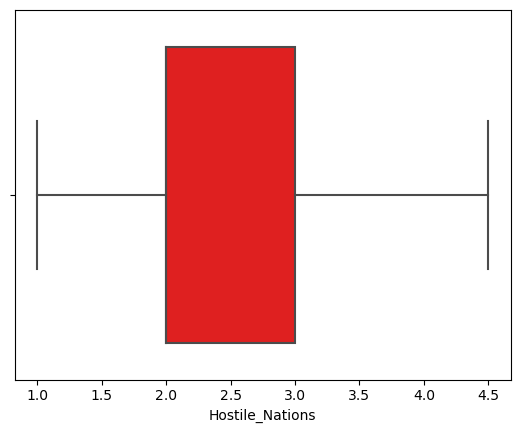

Active_Threats


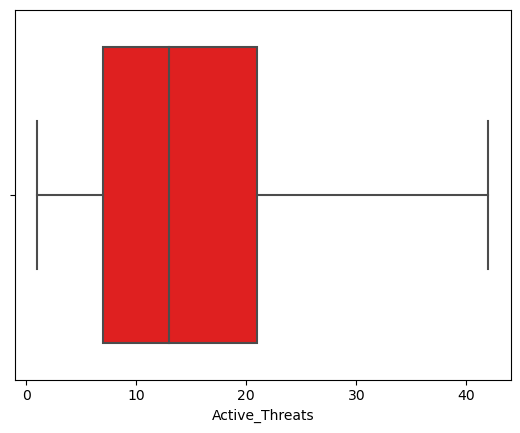

Inactive_Threats


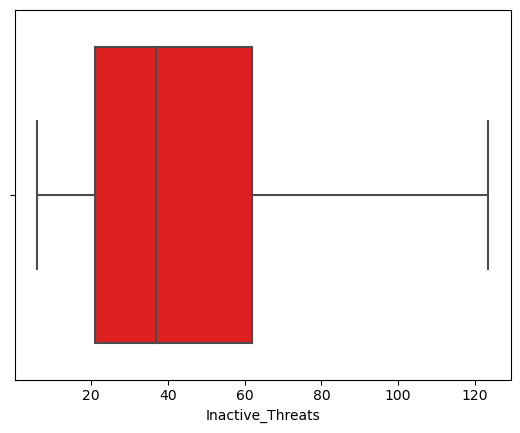

Citizen_Fear_Index


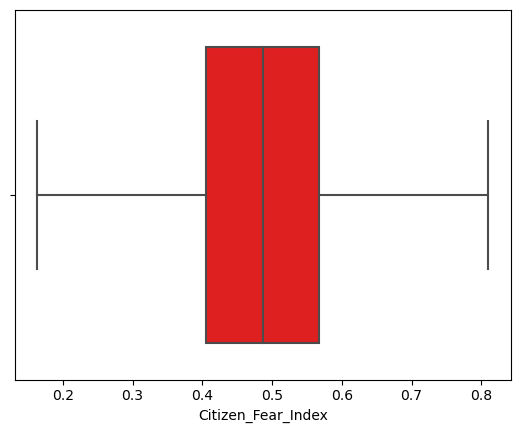

Closest_Threat_Distance(km)


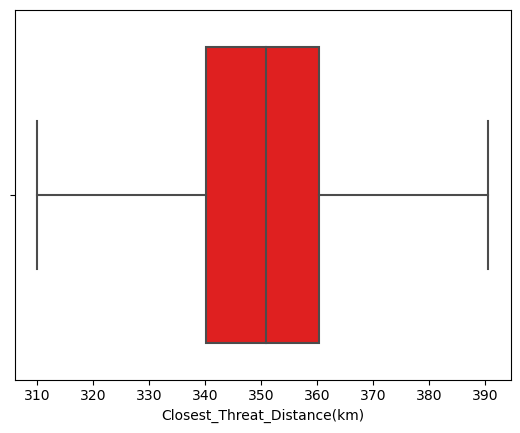

Aircraft_Carriers_Responding


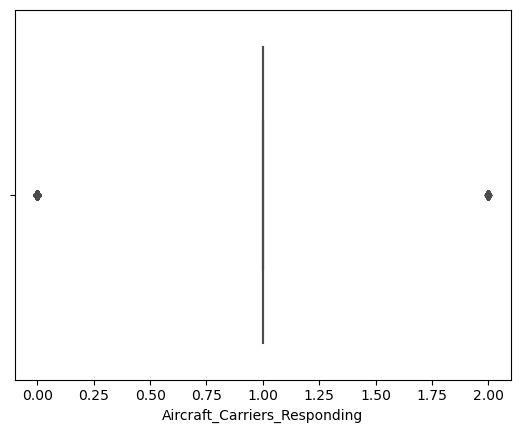

Troops_Mobilized(thousands)


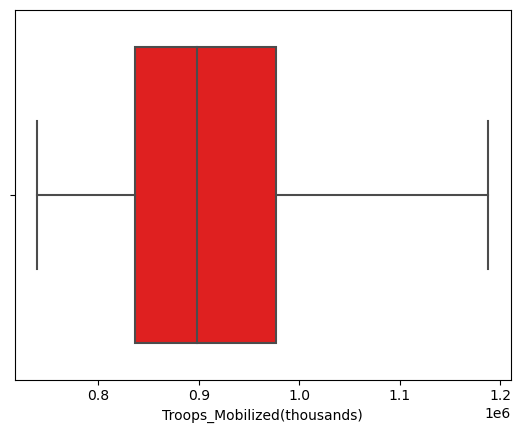

DEFCON_Level


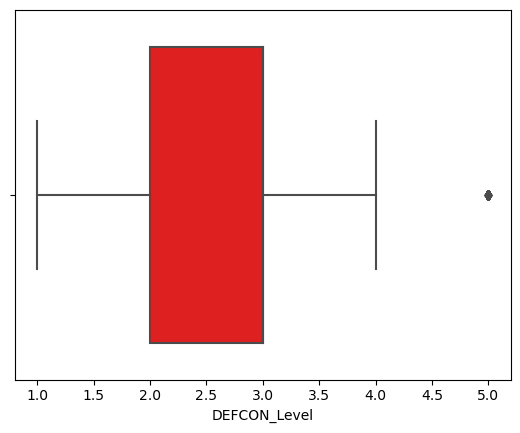

In [21]:
for col in train_df.iloc[:,:].columns:
    print(col)
    sns.boxplot(x = train_df[col], data = train_df, color = 'red')
    plt.show()

In [22]:
train_df.head()

,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands),DEFCON_Level
0,9.0,1,0.30,4.5,19.0,56.0,0.809838,368.88,1,924000.0,2
1,8.0,0,0.26,2.0,4.0,11.0,0.450073,359.34,1,924000.0,2
2,9.0,0,0.57,2.0,18.0,44.0,0.452276,364.64,1,1020800.0,3
3,10.0,0,0.46,2.0,5.0,12.0,0.541850,322.24,1,897600.0,5
4,12.0,1,0.50,1.0,10.0,17.0,0.685022,340.26,1,950400.0,2


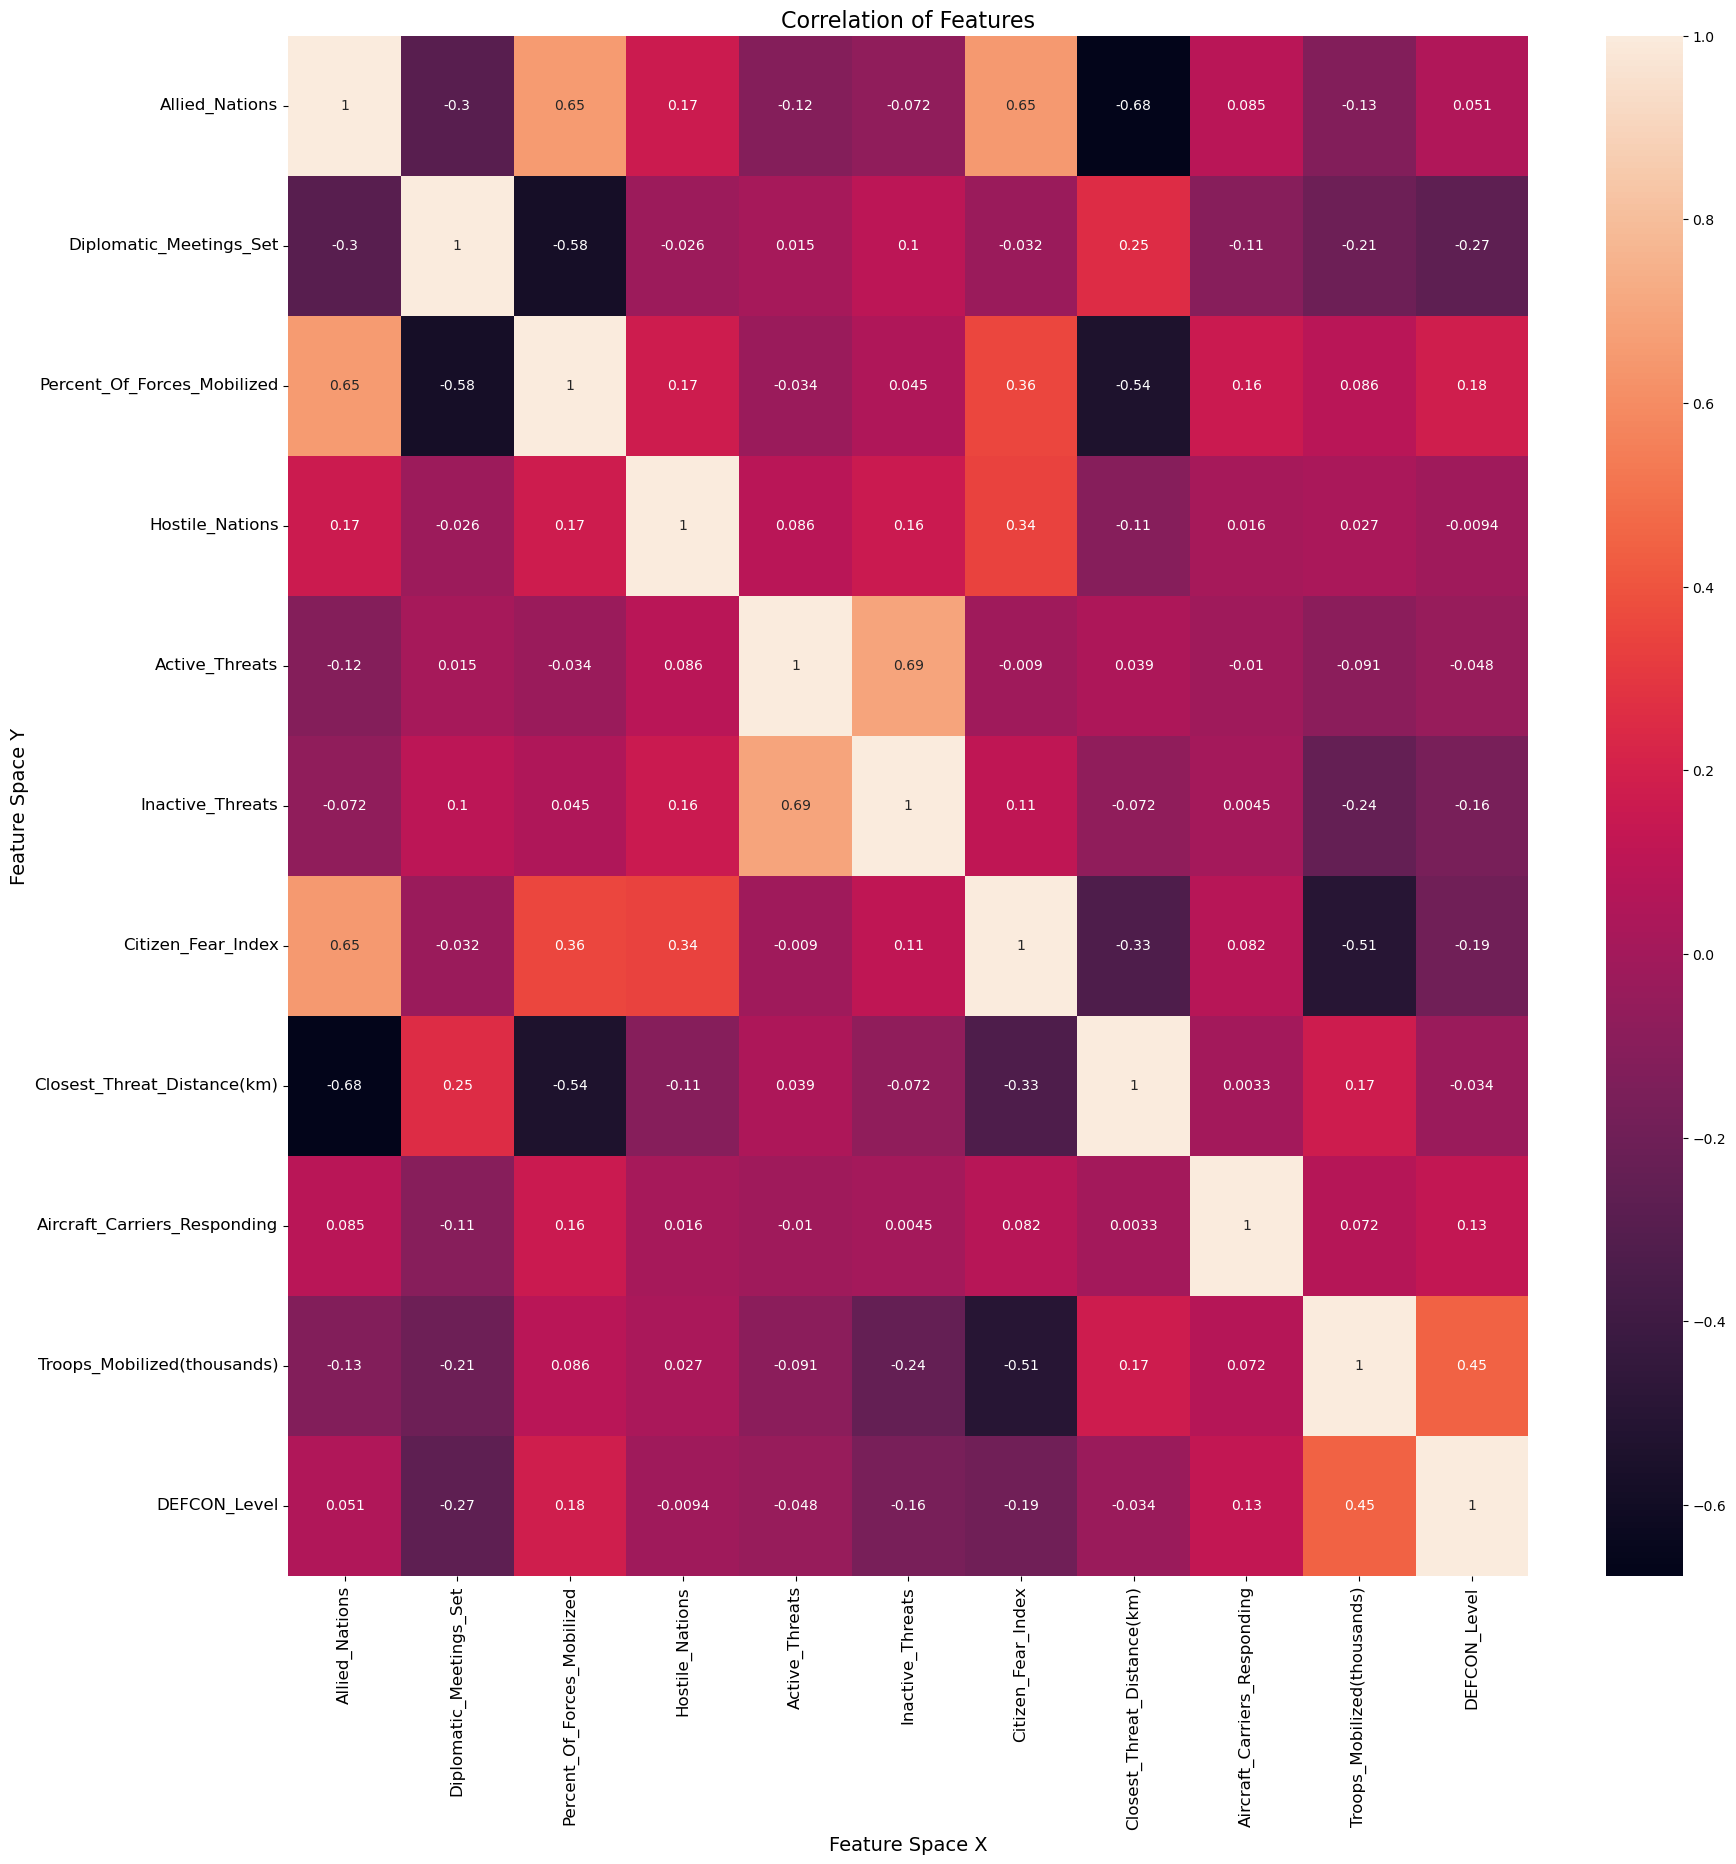

In [23]:
figure = plt.figure(figsize=[20, 20])
sns.heatmap(data=train_df.corr(), annot=True)
plt.xticks(size=12, rotation=90)
plt.yticks(size=12)
plt.xlabel(xlabel='Feature Space X', size=14)
plt.ylabel(ylabel='Feature Space Y', size=14)
plt.title(label='Correlation of Features', size=16)
plt.show()

In [24]:
train_df.head()

,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands),DEFCON_Level
0,9.0,1,0.30,4.5,19.0,56.0,0.809838,368.88,1,924000.0,2
1,8.0,0,0.26,2.0,4.0,11.0,0.450073,359.34,1,924000.0,2
2,9.0,0,0.57,2.0,18.0,44.0,0.452276,364.64,1,1020800.0,3
3,10.0,0,0.46,2.0,5.0,12.0,0.541850,322.24,1,897600.0,5
4,12.0,1,0.50,1.0,10.0,17.0,0.685022,340.26,1,950400.0,2


In [25]:
x = train_df.drop('DEFCON_Level', axis = 1)

In [26]:
y = train_df['DEFCON_Level']

In [27]:
x

,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands)
0,9.0,1,0.30,4.5,19.0,56.0,0.809838,368.88,1,924000.0
1,8.0,0,0.26,2.0,4.0,11.0,0.450073,359.34,1,924000.0
2,9.0,0,0.57,2.0,18.0,44.0,0.452276,364.64,1,1020800.0
3,10.0,0,0.46,2.0,5.0,12.0,0.541850,322.24,1,897600.0
4,12.0,1,0.50,1.0,10.0,17.0,0.685022,340.26,1,950400.0
...,...,...,...,...,...,...,...,...,...,...
7995,6.0,1,0.00,2.0,28.0,44.0,0.209251,372.06,0,968000.0
7996,10.0,0,0.47,2.0,17.0,31.0,0.604258,346.62,1,880000.0
7997,9.0,0,0.41,3.0,7.0,20.0,0.445668,347.68,1,1020800.0
7998,7.0,1,0.21,4.0,31.0,123.5,0.404552,351.92,1,1012000.0


In [28]:
y

0       2
1       2
2       3
3       5
4       2
       ..
7995    3
7996    3
7997    3
7998    3
7999    3
Name: DEFCON_Level, Length: 8000, dtype: int64

In [29]:
from imblearn.over_sampling import SMOTE

In [30]:
sm = SMOTE(random_state = 42)

In [31]:
x_res, y_res = sm.fit_resample(x, y)

In [32]:
x_res

,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands)
0,9.000000,1,0.300000,4.500000,19.000000,56.000000,0.809838,368.880000,1,924000.000
1,8.000000,0,0.260000,2.000000,4.000000,11.000000,0.450073,359.340000,1,924000.000
2,9.000000,0,0.570000,2.000000,18.000000,44.000000,0.452276,364.640000,1,1020800.000
3,10.000000,0,0.460000,2.000000,5.000000,12.000000,0.541850,322.240000,1,897600.000
4,12.000000,1,0.500000,1.000000,10.000000,17.000000,0.685022,340.260000,1,950400.000
...,...,...,...,...,...,...,...,...,...,...
17030,6.890067,0,0.211649,2.000000,41.450337,69.539057,0.163730,358.746114,0,1029600.000
17031,7.842916,0,0.401150,2.842916,5.578542,13.578542,0.379659,329.607220,1,1004582.336
17032,7.000000,0,0.275228,2.000000,8.146876,18.128608,0.351460,330.418692,1,1012000.000
17033,12.000000,0,0.650000,2.000000,6.000000,26.072875,0.655183,313.571530,1,809600.000


In [33]:
y_res.value_counts()

2    3407
3    3407
5    3407
4    3407
1    3407
Name: DEFCON_Level, dtype: int64

In [36]:
from sklearn.model_selection import train_test_split

x_train_res, x_test_res, y_train_res, y_test_res = train_test_split(x_res, y_res, test_size = 0.2, random_state = 42)

In [37]:
print(x_train_res.shape)
print(x_test_res.shape)
print(y_train_res.shape)
print(y_test_res.shape)

(13628, 10)
(3407, 10)
(13628,)
(3407,)


In [43]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [44]:
from sklearn.ensemble import RandomForestClassifier

clf_rand = RandomForestClassifier(random_state = 123)
clf_rand.fit(x_train_res, y_train_res)

RandomForestClassifier(random_state=123)

In [45]:
y_pred_rf_train = clf_rand.predict(x_train_res)
y_pred_rf_test = clf_rand.predict(x_test_res)

In [46]:
def model_eval(actual, predicted):
    cm = confusion_matrix(actual, predicted)
    accuracy = accuracy_score(actual, predicted)
    class_rep = classification_report(actual, predicted)
    print(cm)
    print('The accuracy of the Model is :', accuracy)
    print(class_rep)

In [47]:
print('           Training Report                      ')
model_eval(y_train_res, y_pred_rf_train)

           Training Report                      
[[2712    0    0    0    0]
 [   0 2754    0    0    0]
 [   0    1 2712    0    0]
 [   0    0    1 2729    0]
 [   0    0    0    0 2719]]
The accuracy of the Model is : 0.9998532433225712
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2712
           2       1.00      1.00      1.00      2754
           3       1.00      1.00      1.00      2713
           4       1.00      1.00      1.00      2730
           5       1.00      1.00      1.00      2719

    accuracy                           1.00     13628
   macro avg       1.00      1.00      1.00     13628
weighted avg       1.00      1.00      1.00     13628



In [49]:
print('             Testing Report                  ')
model_eval(y_test_res, y_pred_rf_test)

             Testing Report                  
[[648  25   7  12   3]
 [ 48 455 130  18   2]
 [ 21 163 407  99   4]
 [ 15  12  73 556  21]
 [  0   1   2   8 677]]
The accuracy of the Model is : 0.805107132374523
              precision    recall  f1-score   support

           1       0.89      0.93      0.91       695
           2       0.69      0.70      0.70       653
           3       0.66      0.59      0.62       694
           4       0.80      0.82      0.81       677
           5       0.96      0.98      0.97       688

    accuracy                           0.81      3407
   macro avg       0.80      0.80      0.80      3407
weighted avg       0.80      0.81      0.80      3407



In [50]:
from sklearn.ensemble import BaggingClassifier

clf_bag = BaggingClassifier(base_estimator= clf_rand, n_estimators = 10)
clf_bag.fit(x_train_res, y_train_res)

BaggingClassifier(base_estimator=RandomForestClassifier(random_state=123))

In [51]:
y_pred_bag_train = clf_bag.predict(x_train_res)
y_pred_bag_test = clf_bag.predict(x_test_res)

In [53]:
print('                    Training Report           ')
model_eval(y_train_res, y_pred_bag_train)

                    Training Report           
[[2697   10    1    2    2]
 [  19 2702   24    8    1]
 [   6   37 2630   38    2]
 [   4    2   15 2700    9]
 [   0    0    1    1 2717]]
The accuracy of the Model is : 0.9866451423539772
              precision    recall  f1-score   support

           1       0.99      0.99      0.99      2712
           2       0.98      0.98      0.98      2754
           3       0.98      0.97      0.98      2713
           4       0.98      0.99      0.99      2730
           5       0.99      1.00      1.00      2719

    accuracy                           0.99     13628
   macro avg       0.99      0.99      0.99     13628
weighted avg       0.99      0.99      0.99     13628



In [54]:
print('               Testing Report                            ')
model_eval(y_test_res, y_pred_bag_test)

               Testing Report                            
[[643  28   7  13   4]
 [ 51 454 129  17   2]
 [ 20 156 397 114   7]
 [ 19  12  71 540  35]
 [  1   1   2   7 677]]
The accuracy of the Model is : 0.7957147050190784
              precision    recall  f1-score   support

           1       0.88      0.93      0.90       695
           2       0.70      0.70      0.70       653
           3       0.66      0.57      0.61       694
           4       0.78      0.80      0.79       677
           5       0.93      0.98      0.96       688

    accuracy                           0.80      3407
   macro avg       0.79      0.79      0.79      3407
weighted avg       0.79      0.80      0.79      3407



In [57]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [59]:
classifiers = []

classifiers.append(RandomForestClassifier(random_state = 123))
classifiers.append(BaggingClassifier(base_estimator = clf_rand, n_estimators = 10))

In [60]:
cv_results = []

for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, x_train_res, y_train_res, scoring = 'accuracy', cv = 5))

In [61]:
cv_results

[array([0.78503302, 0.78173147, 0.7945708 , 0.79266055, 0.7706422 ]),
 array([0.77916361, 0.76705796, 0.77512839, 0.78018349, 0.76550459])]

In [62]:
cv_mean = []
cv_std = []
for cv_result in cv_results:
    cv_mean.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [63]:
cv_res = pd.DataFrame({'Cross Validation Mean': cv_mean, 'Cross Validation Std': cv_std, 'Algorithm':['Random Forest Classifier', 'Bagging Classifier']})
cv_res.sort_values(by = 'Cross Validation Mean', ascending  = False, ignore_index = True)

,Cross Validation Mean,Cross Validation Std,Algorithm
0,0.784928,0.008568,Random Forest Classifier
1,0.773408,0.006079,Bagging Classifier


# Tuning :

In [64]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [65]:
parameters = {
    'bootstrap': [True],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [5, 8, 10, 12],
    'n_estimators': [50, 100, 150, 250, 400] }

In [66]:
grid_search = GridSearchCV(clf_rand, parameters, cv = 6, n_jobs = -1, verbose = 2)
grid_search.fit(x_train_res, y_train_res)

Fitting 6 folds for each of 120 candidates, totalling 720 fits


GridSearchCV(cv=6, estimator=RandomForestClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_features': [2, 3],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [5, 8, 10, 12],
                         'n_estimators': [50, 100, 150, 250, 400]},
             verbose=2)

In [67]:
model_rand = grid_search.best_estimator_
model_rand

RandomForestClassifier(max_features=3, min_samples_leaf=3, min_samples_split=5,
                       n_estimators=400, random_state=123)

In [68]:
clf_RandF = RandomForestClassifier(max_features=3, min_samples_leaf=3, min_samples_split=5,
                       n_estimators=400, random_state=123)

In [69]:
clf_RandF.fit(x_train_res, y_train_res)

RandomForestClassifier(max_features=3, min_samples_leaf=3, min_samples_split=5,
                       n_estimators=400, random_state=123)

In [70]:
y_pred_rFr_train = clf_RandF.predict(x_train_res)
y_pred_rFr_test = clf_RandF.predict(x_test_res)

In [72]:
print('                    Training Report           ')
model_eval(y_train_res, y_pred_rFr_train)

                    Training Report           
[[2667   32    7    5    1]
 [  43 2604   72   34    1]
 [  23  134 2478   70    8]
 [  11    8   45 2656   10]
 [   2    0    1    0 2716]]
The accuracy of the Model is : 0.9627971822717933
              precision    recall  f1-score   support

           1       0.97      0.98      0.98      2712
           2       0.94      0.95      0.94      2754
           3       0.95      0.91      0.93      2713
           4       0.96      0.97      0.97      2730
           5       0.99      1.00      1.00      2719

    accuracy                           0.96     13628
   macro avg       0.96      0.96      0.96     13628
weighted avg       0.96      0.96      0.96     13628



In [73]:
print('               Testing Report                            ')
model_eval(y_test_res, y_pred_rFr_test)

               Testing Report                            
[[635  29   8  18   5]
 [ 50 456 125  20   2]
 [ 23 152 401 110   8]
 [ 22  10  72 539  34]
 [  1   1   2   8 676]]
The accuracy of the Model is : 0.7945406515996478
              precision    recall  f1-score   support

           1       0.87      0.91      0.89       695
           2       0.70      0.70      0.70       653
           3       0.66      0.58      0.62       694
           4       0.78      0.80      0.79       677
           5       0.93      0.98      0.96       688

    accuracy                           0.79      3407
   macro avg       0.79      0.79      0.79      3407
weighted avg       0.79      0.79      0.79      3407



In [74]:
test_df = pd.read_csv('DEFCON_test.csv')

In [75]:
test_df.head()

,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands),Id
0,13,1,0.63,4,6.0,14.0,0.552863,316.94,1,1056000.0,11997
1,10,0,0.64,3,6.0,20.0,0.508811,349.80,1,1029600.0,6283
2,8,0,0.40,5,3.0,9.0,0.503671,358.28,1,1126400.0,9211
3,8,1,0.00,4,27.0,67.0,0.535242,336.02,1,827200.0,9827
4,8,1,0.22,2,20.0,38.0,0.470631,347.68,1,959200.0,7564


In [76]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Allied_Nations                2000 non-null   int64  
 1   Diplomatic_Meetings_Set       2000 non-null   int64  
 2   Percent_Of_Forces_Mobilized   2000 non-null   float64
 3   Hostile_Nations               2000 non-null   int64  
 4   Active_Threats                2000 non-null   float64
 5   Inactive_Threats              2000 non-null   float64
 6   Citizen_Fear_Index            2000 non-null   float64
 7   Closest_Threat_Distance(km)   2000 non-null   float64
 8   Aircraft_Carriers_Responding  2000 non-null   int64  
 9   Troops_Mobilized(thousands)   2000 non-null   float64
 10  Id                            2000 non-null   int64  
dtypes: float64(6), int64(5)
memory usage: 172.0 KB


Allied_Nations


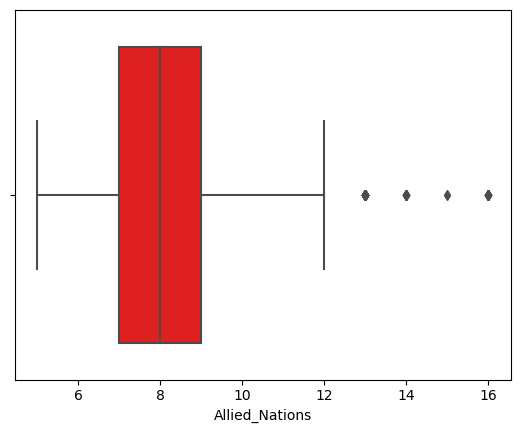

Diplomatic_Meetings_Set


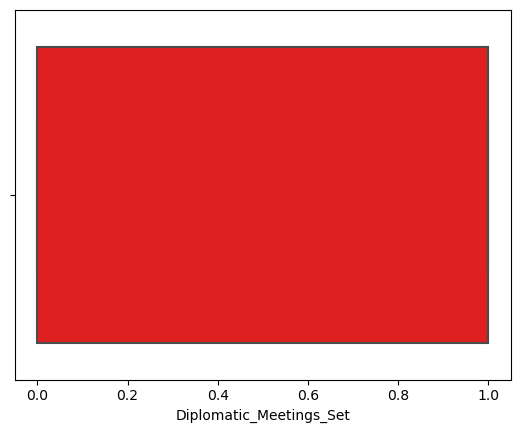

Percent_Of_Forces_Mobilized


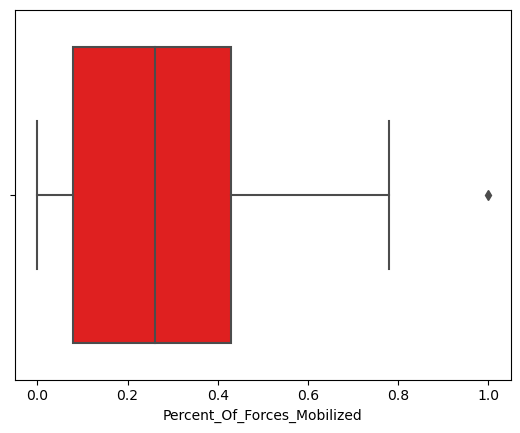

Hostile_Nations


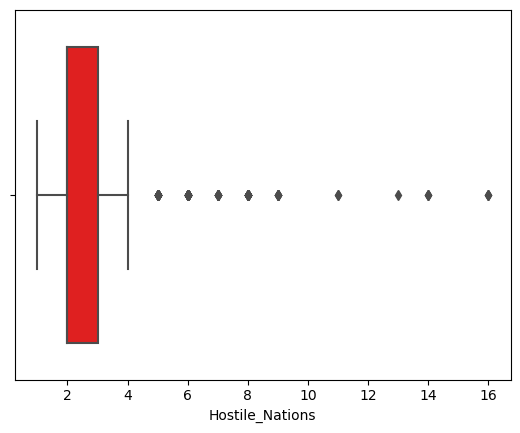

Active_Threats


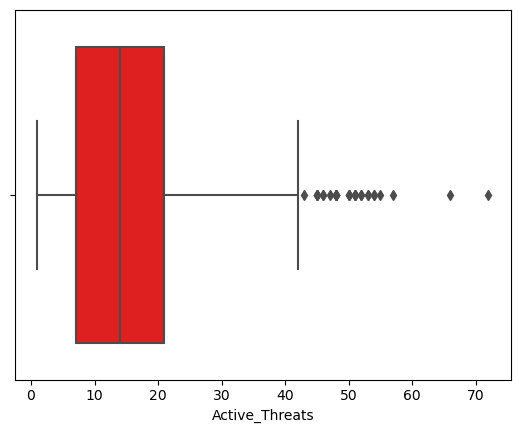

Inactive_Threats


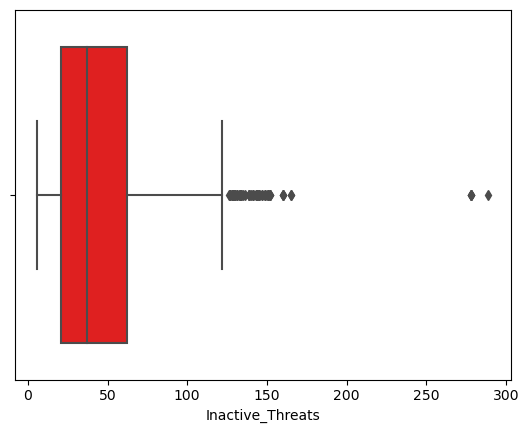

Citizen_Fear_Index


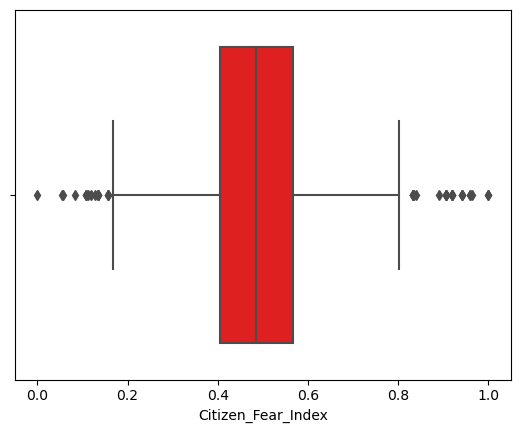

Closest_Threat_Distance(km)


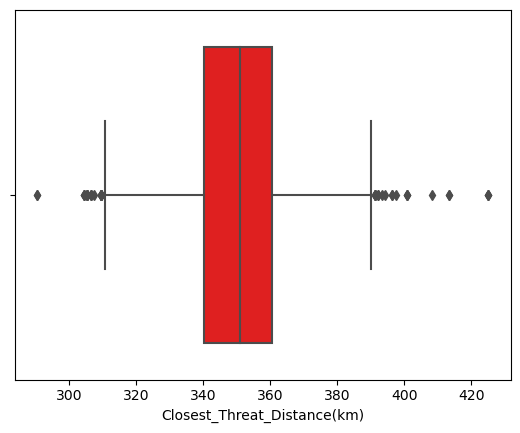

Aircraft_Carriers_Responding


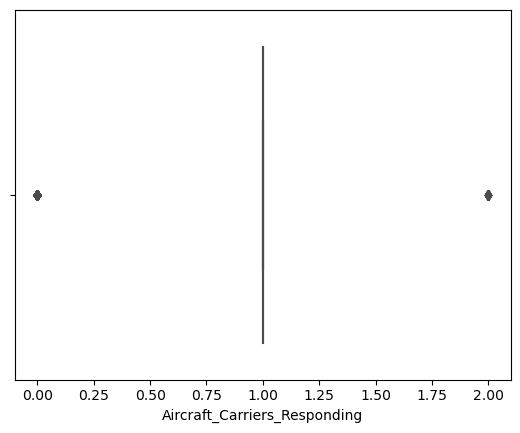

Troops_Mobilized(thousands)


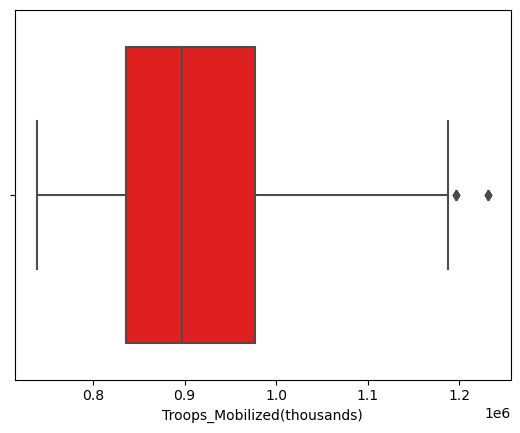

Id


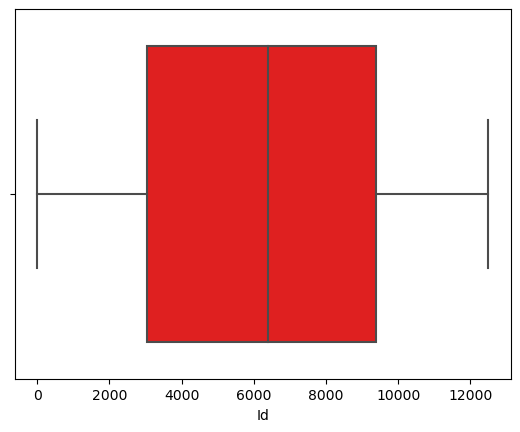

In [77]:
for col in test_df.iloc[:,:].columns:
    print(col)
    sns.boxplot(x = test_df[col], data = test_df, color = 'red')
    plt.show()

In [78]:
def get_bounds(test_df, col):
    Q1 = test_df[col].quantile(0.25)
    Q3 = test_df[col].quantile(0.75)
    IQR = Q3-Q1
    Upper = Q3+(1.5*IQR)
    Lower = Q1-(1.5*IQR)
    return Upper, Lower

In [79]:
num_cols = ['Allied_Nations', 'Percent_Of_Forces_Mobilized', 'Hostile_Nations', 'Active_Threats', 'Inactive_Threats', 'Citizen_Fear_Index',
           'Closest_Threat_Distance(km)', 'Troops_Mobilized(thousands)']

In [80]:
for col in num_col:
    Upper, Lower = get_bounds(test_df, col)
    test_df[col] = np.where(test_df[col]>Upper, Upper, test_df[col])
    test_df[col] = np.where(test_df[col]<Lower, Lower, test_df[col])

Allied_Nations


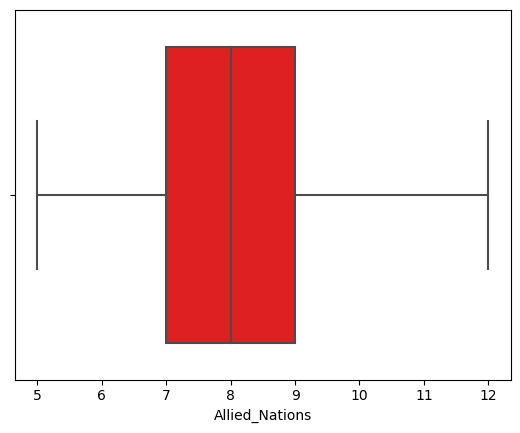

Diplomatic_Meetings_Set


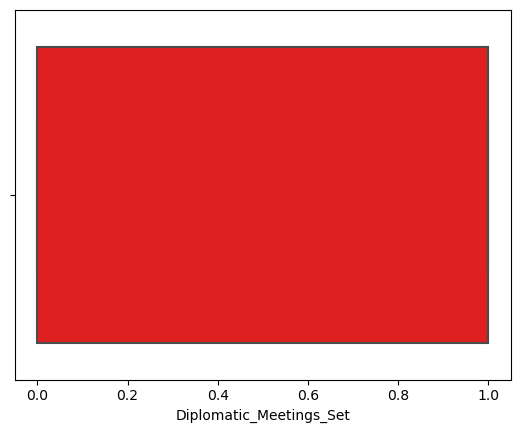

Percent_Of_Forces_Mobilized


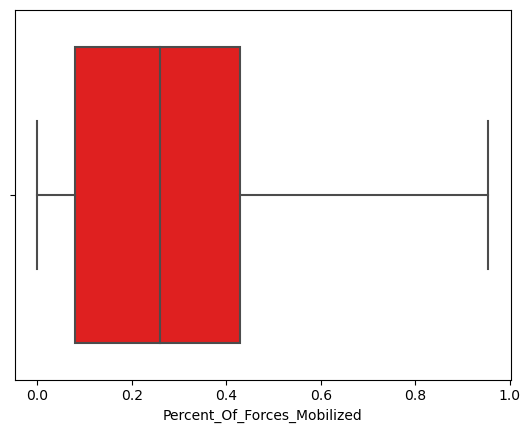

Hostile_Nations


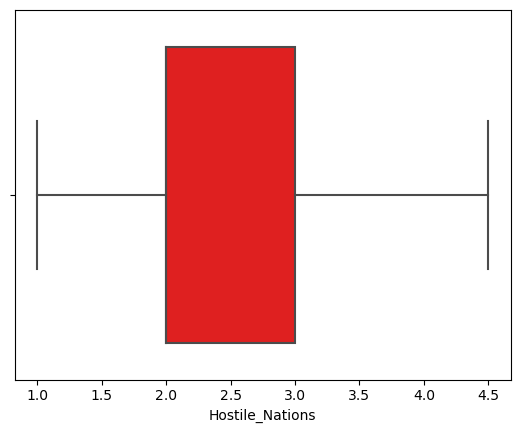

Active_Threats


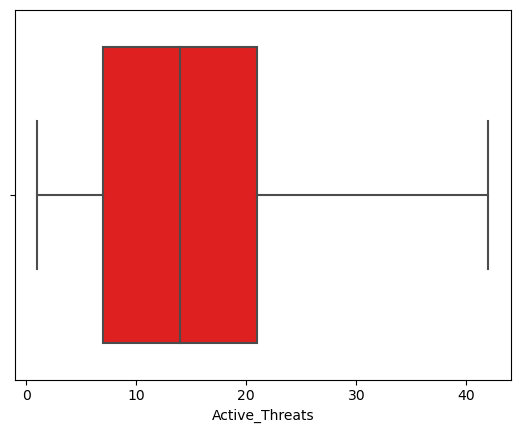

Inactive_Threats


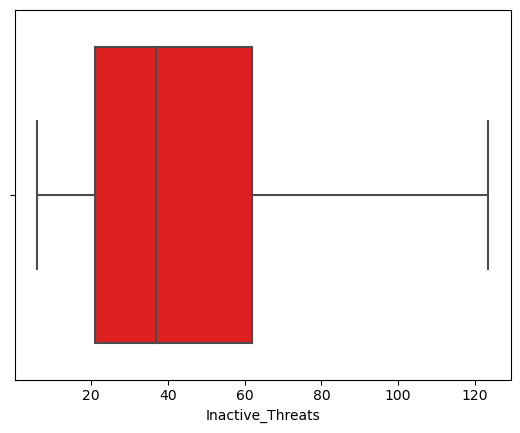

Citizen_Fear_Index


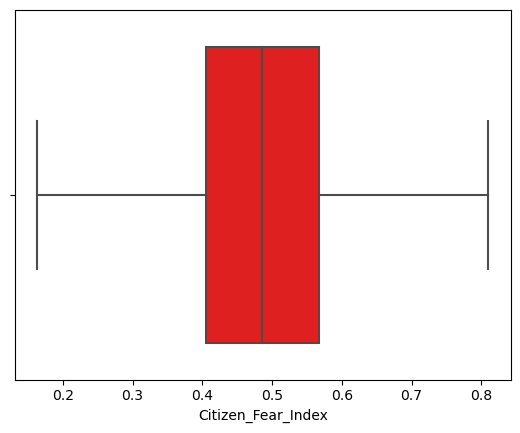

Closest_Threat_Distance(km)


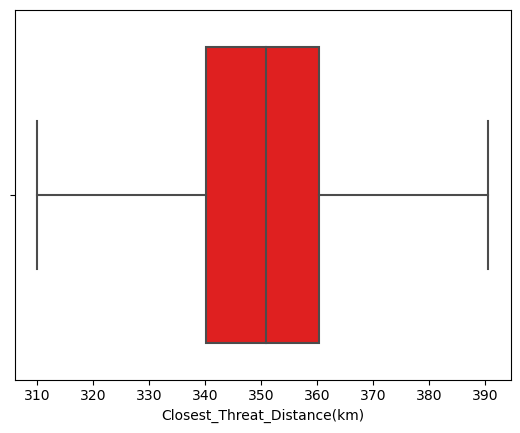

Aircraft_Carriers_Responding


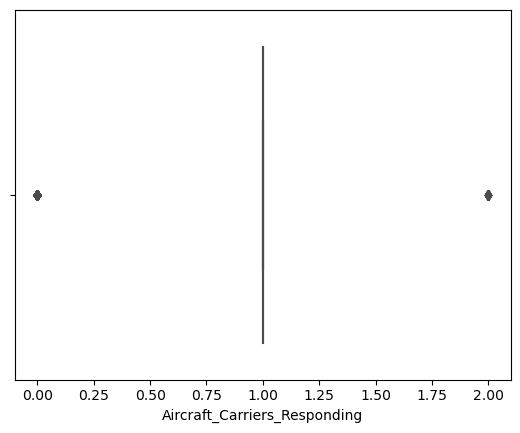

Troops_Mobilized(thousands)


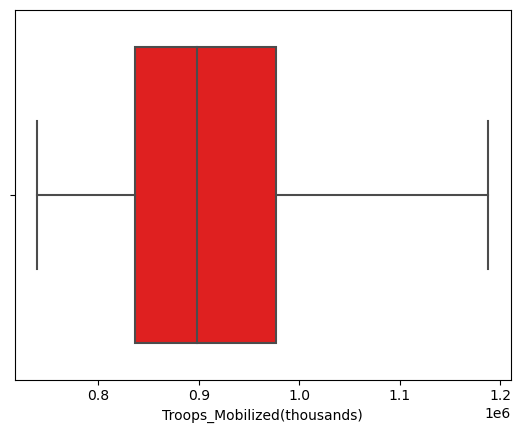

Id


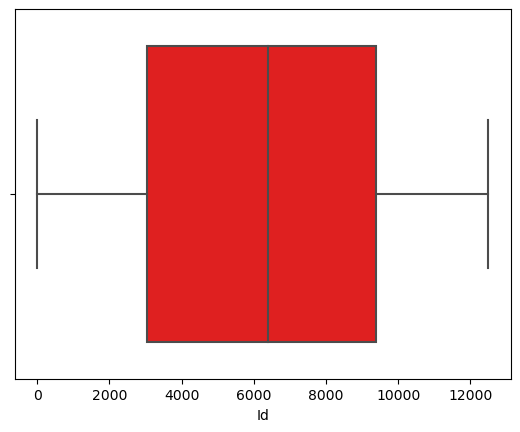

In [81]:
for col in test_df.iloc[:,:].columns:
    print(col)
    sns.boxplot(x = test_df[col], data = test_df, color = 'red')
    plt.show()

In [82]:
df_test = test_df.iloc[:, 0:10]
df_test.head()

,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands)
0,12.0,1,0.63,4.0,6.0,14.0,0.552863,316.94,1,1056000.0
1,10.0,0,0.64,3.0,6.0,20.0,0.508811,349.80,1,1029600.0
2,8.0,0,0.40,4.5,3.0,9.0,0.503671,358.28,1,1126400.0
3,8.0,1,0.00,4.0,27.0,67.0,0.535242,336.02,1,827200.0
4,8.0,1,0.22,2.0,20.0,38.0,0.470631,347.68,1,959200.0


In [84]:
predicted_test = clf_rand.predict(df_test)

In [85]:
predicted_test

array([4, 3, 3, ..., 2, 4, 2], dtype=int64)

In [86]:
test_df['DEFCON_Level'] = predicted_test

In [87]:
test_df.head()

,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands),Id,DEFCON_Level
0,12.0,1,0.63,4.0,6.0,14.0,0.552863,316.94,1,1056000.0,11997,4
1,10.0,0,0.64,3.0,6.0,20.0,0.508811,349.80,1,1029600.0,6283,3
2,8.0,0,0.40,4.5,3.0,9.0,0.503671,358.28,1,1126400.0,9211,3
3,8.0,1,0.00,4.0,27.0,67.0,0.535242,336.02,1,827200.0,9827,2
4,8.0,1,0.22,2.0,20.0,38.0,0.470631,347.68,1,959200.0,7564,3


In [88]:
test_df.drop(['Allied_Nations', 'Diplomatic_Meetings_Set', 'Percent_Of_Forces_Mobilized', 'Hostile_Nations', 'Active_Threats',
             'Inactive_Threats', 'Citizen_Fear_Index', 'Closest_Threat_Distance(km)', 'Aircraft_Carriers_Responding', 'Troops_Mobilized(thousands)'],
            axis = 1, inplace = True)

In [89]:
test_df.head()

,Id,DEFCON_Level
0,11997,4
1,6283,3
2,9211,3
3,9827,2
4,7564,3


In [90]:
test_df.to_csv('submission_defcon.csv', index = False, header = False)